In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime



// Reading the data from the excel sheet

Excel Sheet Used : **"Omnify-Analyst-Intership-Task.xlsx"**

In [6]:
data = pd.read_excel("Omnify-Analyst-Intership-Task.xlsx")

data

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,NaN,NaT,USA
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,NaN,NaT,USA
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,NaN,NaT,USA
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,NaN,NaT,USA


// adding Data to DataFrame for Arrange Data in rows and collumns.

In [7]:
df = data.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      float64       
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(6)
memo

//  **Cleaning the Data **

In [8]:
df['Payment ($)'] = df['Payment ($)'].replace('\W', '', regex=True)

df['Payment ($)'] = df['Payment ($)'].fillna('0')

df['Payment ($)'] = df['Payment ($)'].astype('float')

Getting The Weekly Expense and **Cost ($)** of the ads.

Points from the Data :

*   **Cost of ads Per Week**
*   **Highest Cost in which Week, Campaign and ads group.**



In [17]:
# expense_weekly = df.groupby('Week').agg({'Cost ($)':'sum'}).sort_values('Week',ascending=True)

# expense_weekly

expense_week = pd.to_datetime(df['Week'])
expense_weekly = df.groupby(expense_week.dt.strftime('%D'))['Cost ($)'].sum().sort_values()

expense_weekly

Week
04/19/21     87.38
04/26/21    103.26
04/12/21    137.21
03/01/21    141.40
01/25/21    154.79
03/29/21    172.11
04/05/21    176.96
03/15/21    184.36
02/22/21    190.90
02/01/21    192.58
02/08/21    216.13
05/03/21    229.37
02/15/21    235.30
03/08/21    258.20
03/22/21    308.73
Name: Cost ($), dtype: float64

In [18]:
df['Month'] = pd.to_datetime(df['Week'])
expense_monthly = df.groupby(df['Month'].dt.strftime('%B'))['Cost ($)'].sum().sort_values()

expense_monthly

Month
January      154.79
May          229.37
April        504.81
February     834.91
March       1064.80
Name: Cost ($), dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '04/19/21'),
  Text(1, 0, '04/26/21'),
  Text(2, 0, '04/12/21'),
  Text(3, 0, '03/01/21'),
  Text(4, 0, '01/25/21'),
  Text(5, 0, '03/29/21'),
  Text(6, 0, '04/05/21'),
  Text(7, 0, '03/15/21'),
  Text(8, 0, '02/22/21'),
  Text(9, 0, '02/01/21'),
  Text(10, 0, '02/08/21'),
  Text(11, 0, '05/03/21'),
  Text(12, 0, '02/15/21'),
  Text(13, 0, '03/08/21'),
  Text(14, 0, '03/22/21')])

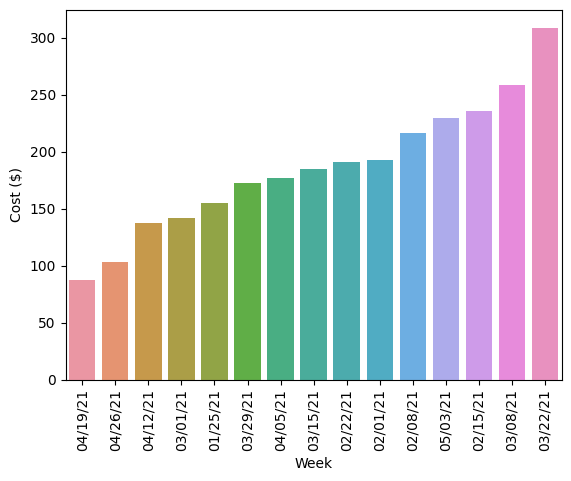

In [42]:
sns.barplot(x='Week', y='Cost ($)', data=expense_weekly.reset_index())
plt.xticks(rotation='vertical')

In [10]:
# weekly_Payment = df.groupby('Week').agg({'Payment ($)': 'sum'}).sort_values('Week',ascending=True)

# weekly_Payment

Payment_week = pd.to_datetime(df['Week'])
weekly_Payment = df.groupby(Payment_week.dt.strftime('%D'))['Payment ($)'].sum().sort_values(ascending=True)

weekly_Payment

Week
02/01/21       0.0
02/22/21       0.0
03/08/21       0.0
03/15/21       0.0
03/29/21       0.0
04/05/21       0.0
04/19/21       0.0
04/26/21       0.0
02/08/21     980.0
03/01/21     980.0
05/03/21    1188.0
02/15/21    1788.0
01/25/21    2168.0
03/22/21    2388.0
04/12/21    2388.0
Name: Payment ($), dtype: float64

In [19]:
df['Month'] = pd.to_datetime(df['Week'])
Payment_monthly = df.groupby(df['Month'].dt.strftime('%B'))['Payment ($)'].sum().sort_values()

Payment_monthly

Month
May         1188.0
January     2168.0
April       2388.0
February    2768.0
March       3368.0
Name: Payment ($), dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '02/01/21'),
  Text(1, 0, '02/22/21'),
  Text(2, 0, '03/08/21'),
  Text(3, 0, '03/15/21'),
  Text(4, 0, '03/29/21'),
  Text(5, 0, '04/05/21'),
  Text(6, 0, '04/19/21'),
  Text(7, 0, '04/26/21'),
  Text(8, 0, '02/08/21'),
  Text(9, 0, '03/01/21'),
  Text(10, 0, '05/03/21'),
  Text(11, 0, '02/15/21'),
  Text(12, 0, '01/25/21'),
  Text(13, 0, '03/22/21'),
  Text(14, 0, '04/12/21')])

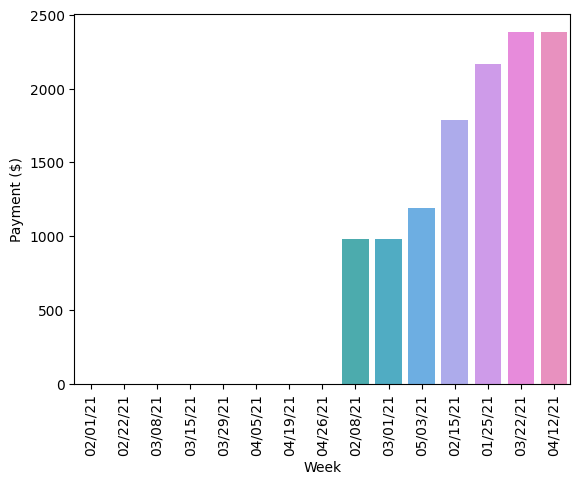

In [12]:
from pandas.io.formats.style_render import DataFrame
sns.barplot(x='Week', y='Payment ($)', data=weekly_Payment.reset_index())
plt.xticks(rotation='vertical')

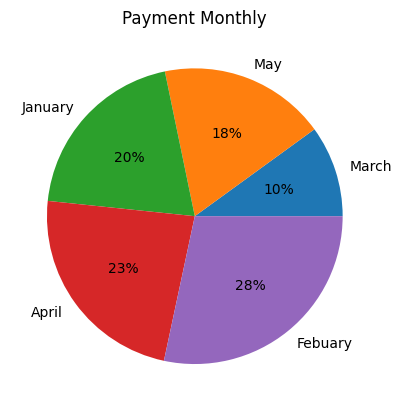

In [16]:
months = {'May','January','April','Febuary','March'}
plt.pie(Payment_monthly, labels=months, autopct='%.0f%%')
plt.title('Payment Monthly')
plt.show()

In [14]:
Return_week = df['Payment ($)']/df['Cost ($)']


In [20]:
Total_cost = df['Cost ($)'].sum()
print('Total_Cost : ', Total_cost)

Total_Payment = df['Payment ($)'].sum()
print('Total_Payment : ', Total_Payment)

Total_Return = Return_week.sum()
print('Total_Return as defined by Payment/Cost : ', Total_Return)


Profit = weekly_Payment - expense_weekly

# profit = df['Payment ($)']-df['Cost ($)']

Profit = Profit.sum()
# profit = profit.sum()

print('Profit : ', Profit)
# print('profit : ', profit)

Profit_Percent = (Profit/Total_cost)*100

print('Profit_Percent : ', Profit_Percent)


Total_Cost :  2788.6800000000003
Total_Payment :  11880.0
Total_Return as defined by Payment/Cost :  455.6678476192823
Profit :  9091.320000000002
Profit_Percent :  326.00800378673785


// Which Keyword is most profitable.

**reservation management system** is the most profitable based on the data, it has lowest Advertisement cost and high Payments.

In [21]:
df['Keyword_Profitable'] = df['Payment ($)']-df['Cost ($)']

Keywords = df.groupby('Search Keyword').agg({'Payment ($)': 'sum','Cost ($)':'sum','Keyword_Profitable':'sum'}).sort_values('Keyword_Profitable',ascending=False)

Keywords

# (Keywords['Payment ($)']*100)/Keywords['Payment ($)'].sum()


,Payment ($),Cost ($),Keyword_Profitable
Search Keyword,,,
reservation management system,4176.0,233.29,3942.71
pool reservation software,3368.0,333.93,3034.07
yoga studio booking software,2168.0,829.24,1338.76
yoga studio software,1188.0,93.34,1094.66
pool reservation system,980.0,240.72,739.28
pilates studio management software,0.0,0.00,0.00
pilates studio software manager,0.0,0.00,0.00
pilates management software,0.0,0.00,0.00
pilates booking system,0.0,0.00,0.00


ValueError: ignored

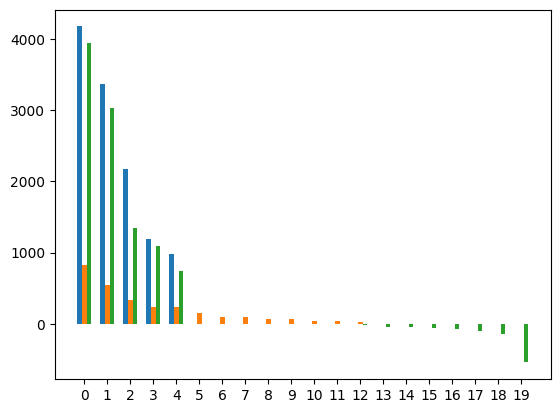

In [22]:
# sns.barplot(x='Search Keyword', y='Payment ($)', data=Keywords.reset_index())
# plt.xticks(rotation='vertical')

Payment = (df.groupby('Search Keyword').agg({'Payment ($)': 'sum'}).sort_values('Payment ($)',ascending=False))['Payment ($)']
Cost = (df.groupby('Search Keyword').agg({'Cost ($)': 'sum'}).sort_values('Cost ($)',ascending=False))['Cost ($)']
Keyword_Profitable = (df.groupby('Search Keyword').agg({'Keyword_Profitable': 'sum'}).sort_values('Keyword_Profitable',ascending=False))['Keyword_Profitable']
x_axis = np.arange(len(Keywords))

# Multi bar Chart

plt.bar(x_axis -0.2, Payment, width=0.2, label = 'Payment')
plt.bar(x_axis +0.0, Cost, width=0.2, label = 'Cost')
plt.bar(x_axis +0.2, Keyword_Profitable, width=0.2, label = 'Keyword_Profitable')

# Xticks

plt.xticks(x_axis, Keywords)

# Add legend

plt.legend()

# Display

plt.show()

In [29]:
Keyword_Profit = {'reservation management system',
'pool reservation software',
'yoga studio booking software',
'yoga studio software',
'pool reservation system',
'pilates studio management software',
'pilates studio software manager',
'pilates management software',
'pilates booking system',
'yoga studio management software',
'yoga studio scheduling software',
'=+pool +reservation software',
'swimming pool reservation system',
'pilates studio software',
'swimming pool booking system',
'yoga studio app',
'pool booking app',
'pilates studio booking software',
'pool scheduling software',
'booking management software'}
Keywords1 = df.groupby(df['Search Keyword']).agg({Keywords['Keyword_Profitable'] : 'sum'}).sort_values(Keywords['Keyword_Profitable'], ascending=False)
plt.pie(Keywords['Keyword_Profitable'], labels=Keywords1, autopct='%.0f%%')

plt.title('Profitable Keywords')

plt.show()

KeyError: ignored

// What is the most Profitable Channel

**EK_Generic_Tri-Tok_Reservation**

In [15]:
df['Profit'] = df['Payment ($)'] - df['Cost ($)']

Campaign = df.groupby('Campaign').agg({'Payment ($)': 'sum','Cost ($)':'sum','Profit':'sum'}).sort_values('Profit',ascending=False)

Campaign


,Payment ($),Cost ($),Profit
Campaign,,,
EK_Generic_Tri-Tok_Reservation,4176.0,435.57,3740.43
EK_Generic_Swimming,3368.0,741.26,2626.74
EK_Generic_Quad-Tok_Yoga,2168.0,822.86,1345.14
EK_Generic_Tri-Tok_Yoga,1188.0,156.46,1031.54
EK_Generic_Swimming_UK,980.0,95.21,884.79
EK_Generic_Tri-Tok_Yoga_Singapore,0.0,0.00,0.00
EK_Generic_Tri-Tok_Reservation_UAE,0.0,5.21,-5.21
EK_Generic_Quad-Tok_Yoga_Singapore,0.0,6.38,-6.38
EK_Generic_Tri-Tok_Reservation_Singapore,0.0,11.33,-11.33


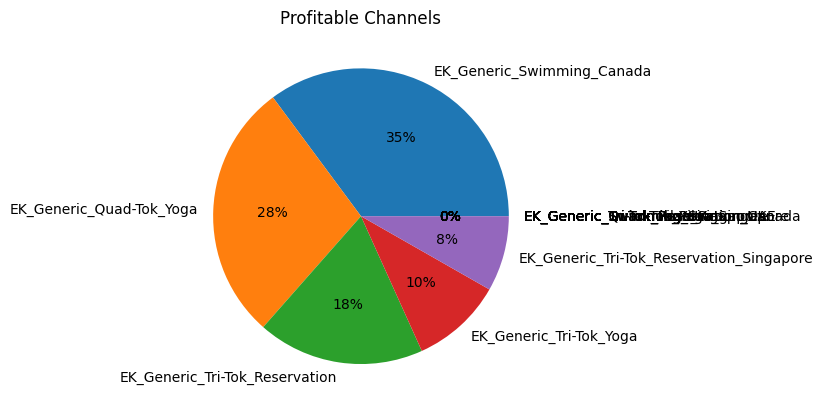

Campaign
EK_Generic_Tri-Tok_Reservation              4176.0
EK_Generic_Swimming                         3368.0
EK_Generic_Quad-Tok_Yoga                    2168.0
EK_Generic_Tri-Tok_Yoga                     1188.0
EK_Generic_Swimming_UK                       980.0
EK_Generic_Tri-Tok_Yoga_Singapore              0.0
EK_Generic_Tri-Tok_Reservation_UAE             0.0
EK_Generic_Quad-Tok_Yoga_Singapore             0.0
EK_Generic_Tri-Tok_Reservation_Singapore       0.0
EK_Generic_Swimming_Canada                     0.0
EK_Generic_Swimming_Singapore                  0.0
EK_Generic_Tri-Tok_Pilates                     0.0
EK_Generic_Quad-Tok_Pilates                    0.0
EK_Generic_Tri-Tok_Reservation_Canada          0.0
EK_Generic_Tri-Tok_Reservation_UK              0.0
Name: Payment ($), dtype: float64

In [16]:
Campaigns = {'EK_Generic_Tri-Tok_Reservation', 'EK_Generic_Swimming', 'EK_Generic_Quad-Tok_Yoga', 'EK_Generic_Tri-Tok_Yoga', 'EK_Generic_Swimming_UK', 'EK_Generic_Tri-Tok_Yoga_Singapore', 'EK_Generic_Tri-Tok_Reservation_UAE', 'EK_Generic_Quad-Tok_Yoga_Singapore',
'EK_Generic_Tri-Tok_Reservation_Singapore',
'EK_Generic_Swimming_Canada',
'EK_Generic_Swimming_Singapore',
'EK_Generic_Tri-Tok_Pilates',
'EK_Generic_Quad-Tok_Pilates',
'EK_Generic_Tri-Tok_Reservation_Canada',
'EK_Generic_Tri-Tok_Reservation_UK'}

plt.pie(Campaign['Payment ($)'], labels=Campaigns, autopct='%.0f%%')

plt.title('Profitable Channels')

plt.show()

Campaign['Payment ($)']

// What is the Affect of Geographical

**USA** is the only country in the data, there no Geographical affect.

In [17]:
Country = df.groupby('Country').agg({'Payment ($)': 'sum','Cost ($)':'sum'}).sort_values('Payment ($)',ascending=False)

Country

,Payment ($),Cost ($)
Country,,
USA,11880.0,2788.68


Questions :

1. **what is the cost per week, highest cost in week.**

2. **what is the payment per week, highest payment in week.**

3. **what is the return per week, hghest return in week.**

4. **what is the spend percent and return percent.**

5. **what is the most profitable channel.**

6. **Which category/keyword is the most profitable.**

7. **Look for insights by analyzing data points on time series graphs.**

8. **Analyse the Impact of geography.**

df['Week'] = pd.to_datetime(df['Week'])
expense_monthly = df.groupby(df['Week'].dt.strftime('%B'))['Cost ($)'].sum().sort_values()

expense_monthly